# In Class Notebook, Week 12/13

You can always access the notebook URL: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week13/inClass_week13.ipynb 

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

## 1. Altair + buildings dataset

In [2]:
data_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv'
buildings = pd.read_csv(data_url)

In [3]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


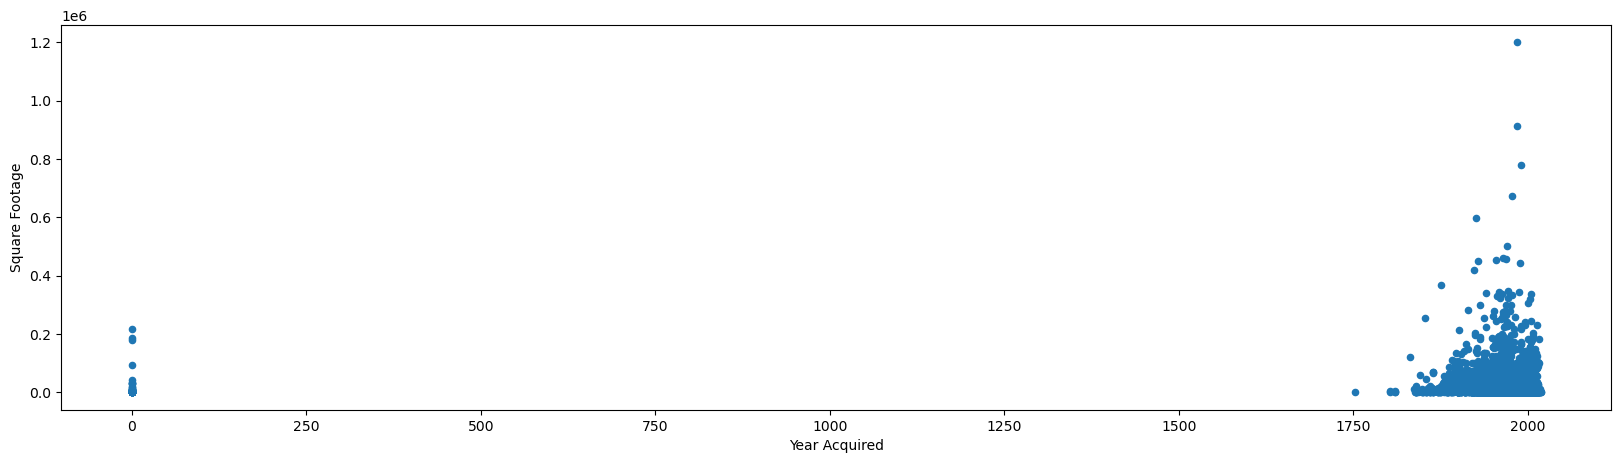

In [5]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5), kind='scatter')
plt.show()

In [7]:
buildings.loc[buildings['Year Acquired']==0, "Year Acquired"] = np.nan
buildings.loc[buildings['Square Footage']==0, "Square Footage"] = np.nan

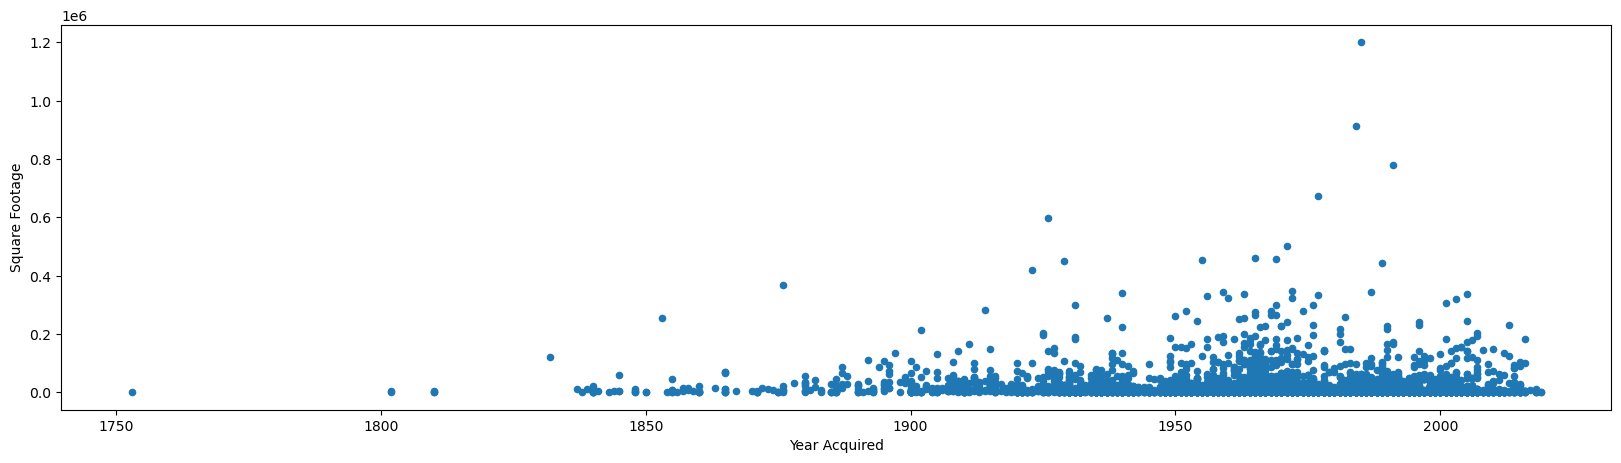

In [8]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5), kind='scatter')
plt.show()

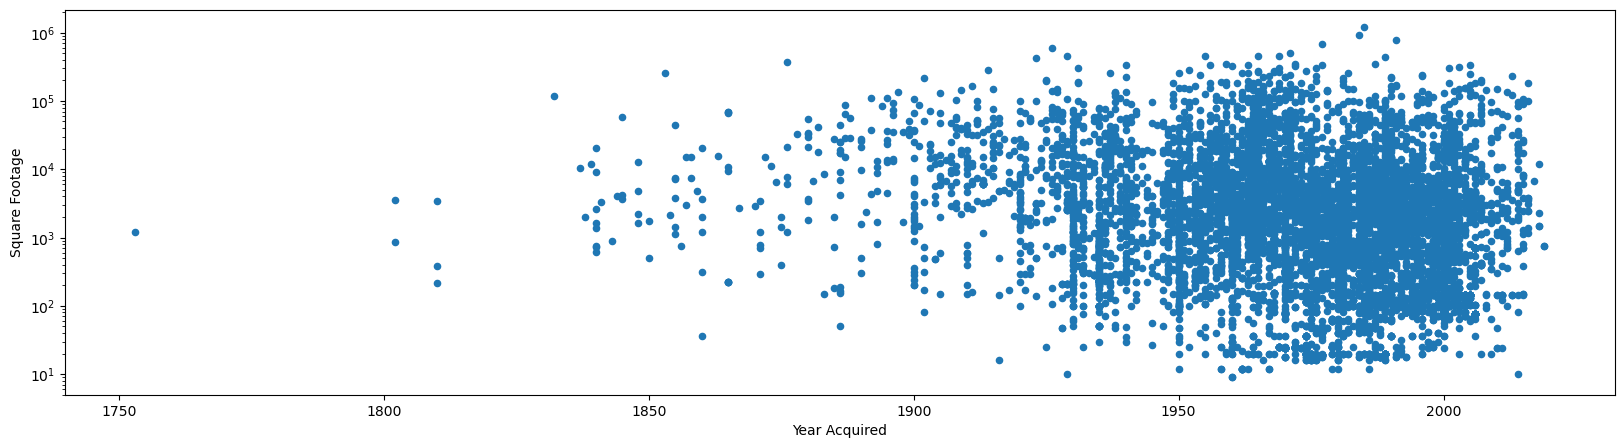

In [9]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5), kind='scatter', logy=True)
plt.show()

In [10]:
stats = buildings.groupby('Year Acquired')["Square Footage"].describe()

In [11]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


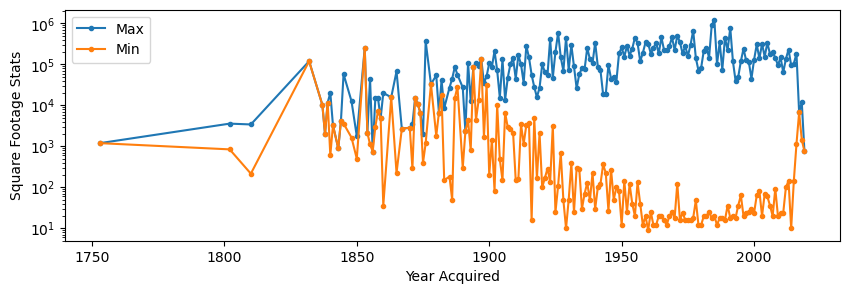

In [12]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(stats['max'], marker='.', label='Max')
ax.plot(stats['min'], marker='.', label='Min')
ax.set_xlabel('Year Acquired')
ax.set_ylabel('Square Footage Stats')
ax.set_yscale('log')
ax.legend()
plt.show()

In [13]:
lines = alt.Chart(stats).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

In [15]:
stats.reset_index().head()

,Year Acquired,count,mean,std,min,25%,50%,75%,max
0,1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.0,1200.0
1,1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.0,3594.0
2,1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.5,3432.0
3,1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.0,120000.0
4,1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.0,10302.0


In [19]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [20]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [22]:
stats.index = pd.to_datetime(stats.index.astype('int'), format='%Y')

In [23]:
stats.index

DatetimeIndex(['1753-01-01', '1802-01-01', '1810-01-01', '1832-01-01',
               '1837-01-01', '1838-01-01', '1839-01-01', '1840-01-01',
               '1841-01-01', '1843-01-01',
               ...
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Year Acquired', length=171, freq=None)

In [24]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [27]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(y='max:Q'),
    lines.mark_line(color='red').encode(y='min:Q')
)

lines

alt.LayerChart(...)

In [28]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q', scale=alt.Scale(type='log'))
    ),
    lines.mark_line(color='red').encode(
        alt.Y('min:Q', scale=alt.Scale(type='log'))
    )
)

lines

alt.LayerChart(...)